In [1]:
#使用简单numpy实现GCN
import networkx as nx
from networkx import to_numpy_matrix
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#数据加载，构造图
G = nx.read_gml('dolphins.gml')

In [3]:
print(len(G))    #dolphin总数
print(G.nodes())    #有哪些节点

62
['Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Five', 'Fork', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN23', 'MN60', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'Patchback', 'PL', 'Quasi', 'Ripplefluke', 'Scabs', 'Shmuddel', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Stripes', 'Thumper', 'Topless', 'TR120', 'TR77', 'TR82', 'TR88', 'TR99', 'Trigger', 'TSN103', 'TSN83', 'Upbang', 'Vau', 'Wave', 'Web', 'Whitetip', 'Zap', 'Zig', 'Zipfel']


In [5]:
print(len(G.edges()))
print(G.edges())#边的总数，有哪些边

159
[('Beak', 'Fish'), ('Beak', 'Grin'), ('Beak', 'Haecksel'), ('Beak', 'SN9'), ('Beak', 'SN96'), ('Beak', 'TR77'), ('Beescratch', 'Jet'), ('Beescratch', 'Knit'), ('Beescratch', 'Notch'), ('Beescratch', 'Number1'), ('Beescratch', 'Oscar'), ('Beescratch', 'SN100'), ('Beescratch', 'SN90'), ('Beescratch', 'Upbang'), ('Bumper', 'Fish'), ('Bumper', 'SN96'), ('Bumper', 'Thumper'), ('Bumper', 'Zipfel'), ('CCL', 'Double'), ('CCL', 'Grin'), ('CCL', 'Zap'), ('Cross', 'Trigger'), ('DN16', 'Feather'), ('DN16', 'Gallatin'), ('DN16', 'Wave'), ('DN16', 'Web'), ('DN21', 'Feather'), ('DN21', 'Gallatin'), ('DN21', 'Jet'), ('DN21', 'Upbang'), ('DN21', 'Wave'), ('DN21', 'Web'), ('DN63', 'Knit'), ('DN63', 'Number1'), ('DN63', 'PL'), ('DN63', 'SN9'), ('DN63', 'Upbang'), ('Double', 'Kringel'), ('Double', 'Oscar'), ('Double', 'SN4'), ('Double', 'Topless'), ('Double', 'Zap'), ('Feather', 'Gallatin'), ('Feather', 'Jet'), ('Feather', 'Ripplefluke'), ('Feather', 'SN90'), ('Feather', 'Web'), ('Fish', 'Patchback'),

C:\Users\Ricardo\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


AttributeError: module 'matplotlib.cbook' has no attribute 'is_numlike'

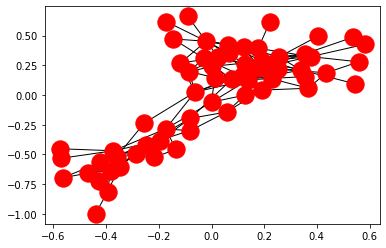

In [7]:
#网络图可视化
def plot_graph(G):
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges
    nx.draw_networkx(G,pos,edges=edges)
    nx.draw_networkx_nodes(G,pos,nodelist=G.nodes(),node_size=300,node_color='r',alpha=0.8)
    nx.draw_networkx_edges(G,pos,edgelist=G.edges(),alpha=0.4)
    plt.show()
plot_graph(G)    

In [8]:
#构建GCN，计算A_hat和D_hat矩阵
order =  sorted(list(G.nodes()))
#按照字母顺序排序
print(order)

['Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Five', 'Fork', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN23', 'MN60', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'PL', 'Patchback', 'Quasi', 'Ripplefluke', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Scabs', 'Shmuddel', 'Stripes', 'TR120', 'TR77', 'TR82', 'TR88', 'TR99', 'TSN103', 'TSN83', 'Thumper', 'Topless', 'Trigger', 'Upbang', 'Vau', 'Wave', 'Web', 'Whitetip', 'Zap', 'Zig', 'Zipfel']


In [9]:
A = to_numpy_matrix(G,nodelist=order)
#邻接矩阵
print('A=\n',A)

A=
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [10]:
#生成对角矩阵
I = np.eye(G.number_of_nodes())
A_hat = A+I
print('A_hat=\n',A_hat)

A_hat=
 [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 1.]]


In [14]:
#D_hat为A_hat的度矩阵
D_hat = np.array(np.sum(A_hat,axis=0))[0]
print('D_hat=\n',D_hat)
#得到对角线上的元素
D_hat = np.matrix(np.diag(D_hat))
print('D_hat=\n',D_hat)

D_hat=
 [ 7.  9.  5.  4.  2.  5.  7.  6.  7.  8.  6.  2.  2.  9. 13.  8.  7. 10.
  8.  5. 10.  7.  2.  4.  7.  4.  4.  6.  6.  6. 10.  2.  4.  2.  8. 12.
  9.  3.  9.  6.  7. 11.  6.  8.  3.  7.  2.  3.  8.  5.  3.  5. 12. 11.
  8.  3.  3. 10.  2.  6.  2.  4.]
D_hat=
 [[7. 0. 0. ... 0. 0. 0.]
 [0. 9. 0. ... 0. 0. 0.]
 [0. 0. 5. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 6. 0. 0.]
 [0. 0. 0. ... 0. 2. 0.]
 [0. 0. 0. ... 0. 0. 4.]]


In [17]:
#初始化权重，normal分布 loc均值 scale标准差,62*2=62*4,4*2
w_1 = np.random.normal(loc=0,scale=1,size=(G.number_of_nodes(),4))
w_2 = np.random.normal(loc=0,size=(w_1.shape[1],2))
print('w_1=\n',w_1)
print('w_2=\n',w_2)

w_1=
 [[ 2.97573547e-01 -2.17027527e-01  7.66131610e-01  1.07622379e+00]
 [ 6.45129426e-01 -5.13815362e-01 -1.99117547e+00 -6.44205274e-01]
 [ 1.80410490e+00  2.00360397e-01  3.37526613e-01 -3.50874784e-01]
 [ 6.80850530e-01  8.53064782e-01 -1.54885128e+00 -1.13667164e+00]
 [ 4.94996632e-02 -2.40978281e-01  1.12218605e+00 -8.29602589e-01]
 [-1.07182590e-02  1.15474315e+00 -1.45404807e+00 -1.78949683e+00]
 [-1.03973510e+00 -1.48912755e+00 -3.82200786e-02 -2.55375276e-01]
 [-5.86956467e-01 -2.86471269e+00 -5.90557475e-01  3.30815611e-01]
 [ 9.41944265e-01  1.10842578e+00  5.90133508e-01 -1.22284755e+00]
 [-2.13503922e+00  6.83369723e-01  2.79951732e-01  1.25497599e+00]
 [ 4.40626816e-01 -5.26867192e-01  1.02125495e+00 -2.63272177e+00]
 [-8.79742316e-01 -7.27187845e-01  3.13829416e+00  1.12359437e+00]
 [-3.32528111e-01  3.98915549e-02 -1.05725415e-01  2.53095368e+00]
 [ 6.90874289e-01 -1.57409627e+00  3.26572860e-01  6.03769444e-01]
 [ 4.50911581e-01 -7.32879284e-01  1.70225644e+00  2.311

In [24]:
#激活函数：x<0时，结果=0；x>0时，结果=x
def relu(x):
    return(abs(x)+x)/2

In [31]:
#叠加GCN层，只适用单位矩阵为特征表征，每个节点被表示为一个 one-hot 编码的类别变量
def gcn_layer(A_hat,D_hat,X,W):
    return relu(D_hat**-1*A_hat*X*W)
H_1 = gcn_layer(A_hat,D_hat,I,w_1)
H_2 = gcn_layer(A_hat,D_hat,H_1,w_2)

In [33]:
print(H_1.shape)
print(H_2.shape)

(62, 4)
(62, 2)


In [36]:
#提取特征表征
output = H_2
feature_representation = {}
nodes = list(G.nodes())
for i in range(len(nodes)):
    feature_representation[nodes[i]]=np.array(output)[i]
print('feature_representation=\n',feature_representation)

feature_representation=
 {'Beak': array([0.4386042 , 0.05422829]), 'Beescratch': array([0.17902678, 0.20173204]), 'Bumper': array([0.80954772, 0.        ]), 'CCL': array([0.54758454, 0.56389001]), 'Cross': array([0.        , 0.30455978]), 'DN16': array([0.0946887 , 0.15212173]), 'DN21': array([0.04638021, 0.09565358]), 'DN63': array([0.04140065, 0.08437912]), 'Double': array([0.68503071, 0.53919219]), 'Feather': array([0.01911717, 0.1372714 ]), 'Fish': array([0.75709143, 0.        ]), 'Five': array([0.        , 0.97612891]), 'Fork': array([0.       , 0.2822564]), 'Gallatin': array([0.01699304, 0.12201903]), 'Grin': array([0.06435033, 0.26320553]), 'Haecksel': array([0.09079841, 0.22859862]), 'Hook': array([0.31408985, 0.19322082]), 'Jet': array([0.06575332, 0.1790791 ]), 'Jonah': array([0.19717231, 0.21688876]), 'Knit': array([0.2733355, 0.1166723]), 'Kringel': array([0.53024371, 0.34984954]), 'MN105': array([0.06111306, 0.21126749]), 'MN23': array([0.        , 0.01537063]), 'MN60': ar

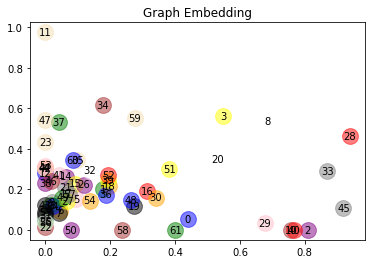

In [38]:
#不同节点value，绘制不同的颜色
def getValue(value):
    colorList = ['blue','green','purple','yellow','red','pink','orange','black','white','gray','brown','wheat']
    return colorList[int(value)]

# 绘制output，节点GCN embedding可视化
def plot_node(output,title):
    value=-1
    for i in range(len(nodes)):
        node_name=nodes[i]
        value = (value+1)%12
        plt.scatter(np.array(output)[i,0],np.array(output)[i,1],label=str(i),color=getValue(value),alpha=0.5,s=250)
        plt.text(np.array(output)[i,0],np.array(output)[i,1],i,horizontalalignment='center',verticalalignment='center',fontdict={'color':'black'})
    plt.title(title)
    plt.show()
plot_node(output,'Graph Embedding')

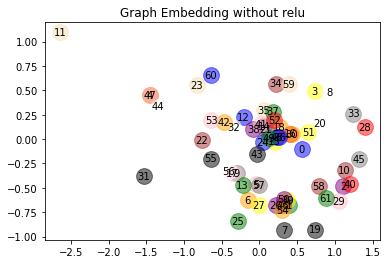

In [41]:
#去掉激活函数的效果
def gcn_layer(A_hat,D_hat,X,W):
    return D_hat**(-1)*A_hat*X*W
H_1 = gcn_layer(A_hat,D_hat,I,w_1)
H_2 = gcn_layer(A_hat,D_hat,H_1,w_2)
output=H_2
plot_node(output,'Graph Embedding without relu')